# Auswertung der Straftaten in Los Angeles von 2020-01 bis 2024-06
## Seminararbeit Wahlfach Datenanlyse in der Praxis
Benjamin Stöver

Los Angeles, eine der bevölkerungsreichsten Städte der USA, steht immer wieder im Fokus, wenn es um Kriminalität und öffentliche Sicherheit geht. Die Stadt vereint zahlreiche kulturelle, soziale und wirtschaftliche Gegensätze, was auch Einfluss auf die Verteilung und Art der Straftaten hat. Um diese Zusammenhänge besser verstehen zu können, sind Datenanalysen ein entscheidendes Instrument, um Verbrechensmuster zu erkennen und gezielte Maßnahmen zur Prävention und Bekämpfung zu entwickeln.

Diese Seminararbeite basiert auf dem Datensatz (LA_Crime_Data_from_2020_to_Present.csv), welcher auf der Internetseite kaggle unter folgendem Link zu finden ist "https://www.kaggle.com/datasets/haseefalam/crime-dataset". Er enthält detaillierte Informationen wie das Datum und die Uhrzeit der Vorfälle, die Kategorien der Straftaten und deren geografische Lage.

# Import der wichtigsten Python Bibliotheken
Für die Analyse und Visualisierung der Daten wurden **Pandas** zur Datenverarbeitung sowie **Matplotlib** und **Seaborn** zur Erstellung von Diagrammen verwendet. Diese Bibliotheken ermöglichen eine effiziente Auswertung und ansprechende Darstellung der Ergebnisse.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen und DataFrame erstellen

In [2]:
# Quelle Dataset
# https://www.kaggle.com/datasets/haseefalam/crime-dataset
df = pd.read_csv("LA_Crime_Data_from_2020_to_Present.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           955339 non-null  int64  
 1   Date Rptd       955339 non-null  object 
 2   DATE OCC        955339 non-null  object 
 3   TIME OCC        955339 non-null  int64  
 4   AREA            955339 non-null  int64  
 5   AREA NAME       955339 non-null  object 
 6   Rpt Dist No     955339 non-null  int64  
 7   Part 1-2        955339 non-null  int64  
 8   Crm Cd          955339 non-null  int64  
 9   Crm Cd Desc     955339 non-null  object 
 10  Mocodes         818664 non-null  object 
 11  Vict Age        955339 non-null  int64  
 12  Vict Sex        825294 non-null  object 
 13  Vict Descent    825284 non-null  object 
 14  Premis Cd       955327 non-null  float64
 15  Premis Desc     954770 non-null  object 
 16  Weapon Used Cd  325019 non-null  float64
 17  Weapon Des

Die Ausgabe von df.info() zeigt, dass der Datensatz insgesamt 955339 Zeilen und 28 Spalten enthält.

In [4]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


# Bedeutung der Spalten im Datensatz

| **Spaltenname**     | **Beschreibung**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| **DR_NO**           | Eindeutige Fallnummer der Polizei.                                              |
| **Date Rptd**       | Datum, an dem der Vorfall gemeldet wurde.                                       |
| **DATE OCC**        | Datum, an dem der Vorfall tatsächlich stattgefunden hat.                        |
| **TIME OCC**        | Uhrzeit des Vorfalls.                                                          |
| **AREA**            | Code des geografischen Gebiets (Police Division) innerhalb von Los Angeles.     |
| **AREA NAME**       | Name der Police Division.                                                      |
| **Rpt Dist No**     | Berichtsdistrikt-Nummer (Reporting District Number).                           |
| **Part 1-2**        | Klassifizierung des Verbrechens:                                               |
|                     | - **Part 1**: Schwerwiegendere Verbrechen (Mord, Raub, Einbruch, Diebstahl).    |
|                     | - **Part 2**: Weniger schwerwiegende Vergehen (Vandalismus, Drogenvergehen).    |
| **Crm Cd**          | Verbrechenscode – numerische Zuordnung der Straftat.                           |
| **Crm Cd Desc**     | Beschreibung der Straftat.                                                     |
| **Mocodes**         | Modus Operandi-Codes – wie wurde die Straftat begangen (Tatmuster).            |
| **Vict Age**        | Alter des Opfers, falls verfügbar.                                             |
| **Vict Sex**        | Geschlecht des Opfers ("M" = Male, "F" = Female, "X" = Unbekannt).             |
| **Vict Descent**    | Herkunft/Abstammung des Opfers:                                                |
|                     | - "H" = Hispanic/Latino, "W" = White, "B" = Black/African American usw.        |
| **Premis Cd**       | Code des Tatorts.                                                              |
| **Premis Desc**     | Beschreibung des Tatorts.                                                      |
| **Weapon Used Cd**  | Waffencode.                                                                    |
| **Weapon Desc**     | Beschreibung der verwendeten Waffe.                                            |
| **Status**          | Status des Falls, z.B. "IC" (Investigation Complete) oder "AO" (Arrest Made).  |
| **Status Desc**     | Beschreibung des Status (z.B. "Adult Arrest", "Invest Cont").                  |
| **Crm Cd 1–4**      | Weitere Verbrechenscodes, falls vorhanden.                                     |
| **LOCATION**        | Adresse des Vorfalls.                                                          |
| **Cross Street**    | Nächste Straßenkreuzung zum Tatort.                                            |
| **LAT**             | Breitengrad des Vorfalls.                                                      |
| **LON**             | Längengrad des Vorfalls.                                                       |



In [44]:
# Anzahl der fehlenden Werte pro Spalte berechnen
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values()

Status                 1
Crm Cd 1              11
Premis Cd             12
Premis Desc          569
Vict Sex          130045
Vict Descent      130055
Mocodes           136675
Weapon Used Cd    630320
Weapon Desc       630320
Cross Street      806439
Crm Cd 2          886873
Crm Cd 3          953045
Crm Cd 4          955275
dtype: int64

Die Analyse der fehlenden Werte zeigt, dass in mehreren Spalten des Datensatzes Datenlücken bestehen. Die Spalten Crm Cd 2, Crm Cd 3 und Crm Cd 4 weisen dabei die größten Lücken auf, was darauf hindeutet, dass diese zusätzlichen Klassifikationen möglicherweise nur in speziellen Fällen dokumentiert wurden.

Die Spalten Weapon Used Cd und Weapon Desc enthalten über 630.000 fehlende Werte, was darauf schließen lässt, dass Angaben zu eingesetzten Waffen häufig nicht erfasst wurden. Dies könnte darauf zurückzuführen sein, dass solche Informationen bei bestimmten Verbrechen, wie beispielsweise Diebstählen ohne Gewaltanwendung, nicht relevant sind.

# Straftaten pro Monat

In [6]:
df_crimes = df.copy() # Kopie des Dataframes erstellen
df_crimes["DATE OCC"] = pd.to_datetime(df_crimes["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p") # Umwandlung der Spalte DATE OCC in Datetime Format
df_crimes["YEAR OCC"] = df_crimes["DATE OCC"].dt.year # Jahr aus Spalte DATE OCC extrahiert
df_crimes["MONTH OCC"] = df_crimes["DATE OCC"].dt.month # Monat aus Spalte DATE OCC extrahiert

# Beide Spalten in eine Spalte zusammengefasst verbunden über "-"
# zfill(2) setzt voranstehende Nullen bis die gewollte Länge der Monate von 2 erreicht ist
df_crimes["YEAR-MONTH OCC"] = df_crimes["YEAR OCC"].astype(str) + "-" + df_crimes["MONTH OCC"].astype(str).str.zfill(2)
# Erstellt neuen Dataframe "df_crimes_per_month wobei nach "MONTH OCC" gruppiert wird und dann die Anzahl berechnet wird
df_crimes = df_crimes.groupby(["YEAR-MONTH OCC"]).size().reset_index(name="CRIME COUNT")

Um die Straftaten pro Monat verteilt über die Jahre zu analysieren, habe ich die Spalte DATE OCC aufgeteilt und zwei neue Spalten, YEAR OCC und MONTH OCC, erstellt. Diese Spalten ermöglichen es, die Daten zeitlich genauer zu strukturieren. Anschließend wurden die Daten zusammengefasst, um die Anzahl der Straftaten pro Monat chronologisch und übersichtlich darzustellen.

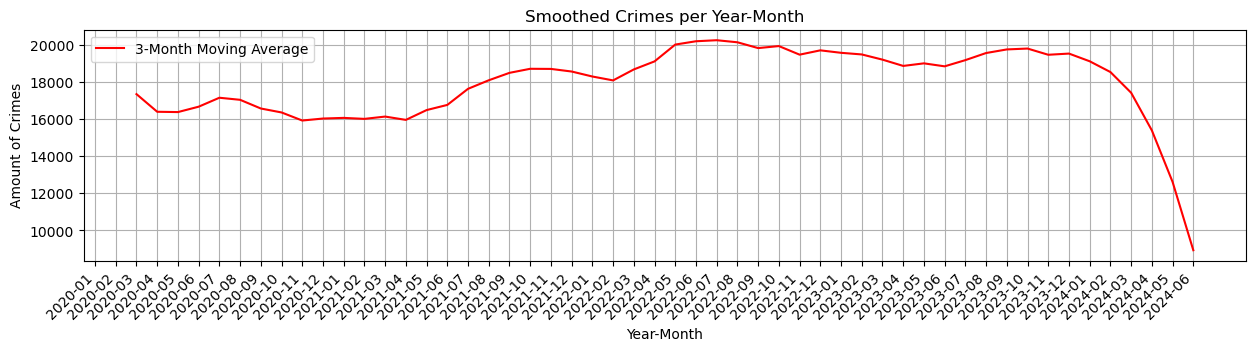

In [7]:
# Berechnung des gleitenden Durchschnitts (z.B. über 3 Monate)
df_crimes["MOVING_AVERAGE"] = df_crimes["CRIME COUNT"].rolling(window=3).mean()

plt.figure(figsize=(15, 3)) # Erstellt eine figure die 15 inches breit und 3 inches hoch ist
plt.grid(True) # Gitter für bessere Lesbarkeit
plt.xticks(rotation=45, ha='right')
plt.plot(df_crimes["YEAR-MONTH OCC"], df_crimes["MOVING_AVERAGE"], color="red", label="3-Month Moving Average")
plt.xlabel("Year-Month")
plt.ylabel("Amount of Crimes")
plt.title("Smoothed Crimes per Year-Month")
plt.legend()
plt.show()

Die vorliegenden Daten zeigen monatliche Kriminalitätszahlen von Januar 2020 bis Juni 2024, wobei jeder Eintrag die "Year-Month"-Kombination und die zugehörige Kriminalitätsanzahl (CRIME COUNT) enthält. Auffällig ist, dass die Kriminalitätszahlen im Laufe der Zeit zunächst schwanken, bis sie gegen Ende des betrachteten Zeitraums, insbesondere ab 2024, stark zurückgehen.

Der gleitende Durchschnitt hilft dabei kurzfristige Schwankungen zu glätten um den übergeordneten Trend besser sichtbar zu machen.

Der Anstieg der Kriminalitätsraten zwischen Februar und Oktober 2022 ist wahrscheinlich auf eine Kombination aus saisonalen Faktoren, der Wiederaufnahme des öffentlichen Lebens nach der Pandemie zurückzuführen. Ab 2022 wurden weltweit viele Beschränkungen aufgehoben, wodurch das öffentliche Leben wieder zunahm. Dies könnte zu einem „Nachholeffekt“ geführt haben, bei dem mehr soziale Interaktionen und Aktivitäten auch mit einer Zunahme von Straftaten einhergingen.

Der drastische Rückgang der Kriminalitätszahlen ab 2024 in Los Angeles könnte durch eine Kombination aus technologischen Fortschritten, wie Überwachungskameras, Predictive Policing (vorhersagende Polizeiarbeit) und Einsatz von Künstlicher Intelligenz zur Analyse von Kriminalitätsschwerpunkten und effektiveren Polizeimaßnahmen erklärt werden.

# LA's Top 10

In [8]:
# .value_counts sortiert immer absteigender Anzahl
# Top 10 Verbrechen
df_crimes_desc = df["Crm Cd Desc"].value_counts()
df_top10_crimes = df_crimes_desc.head(10)
# Top 10 verwendete Waffen
df_weapons_desc = df["Weapon Desc"].value_counts()
df_top10_weapons = df_weapons_desc.head(10)
# Top 10 Crime Areas
df_area_desc = df["AREA NAME"].value_counts()
df_top10_crime_areas = df_area_desc.head(10)

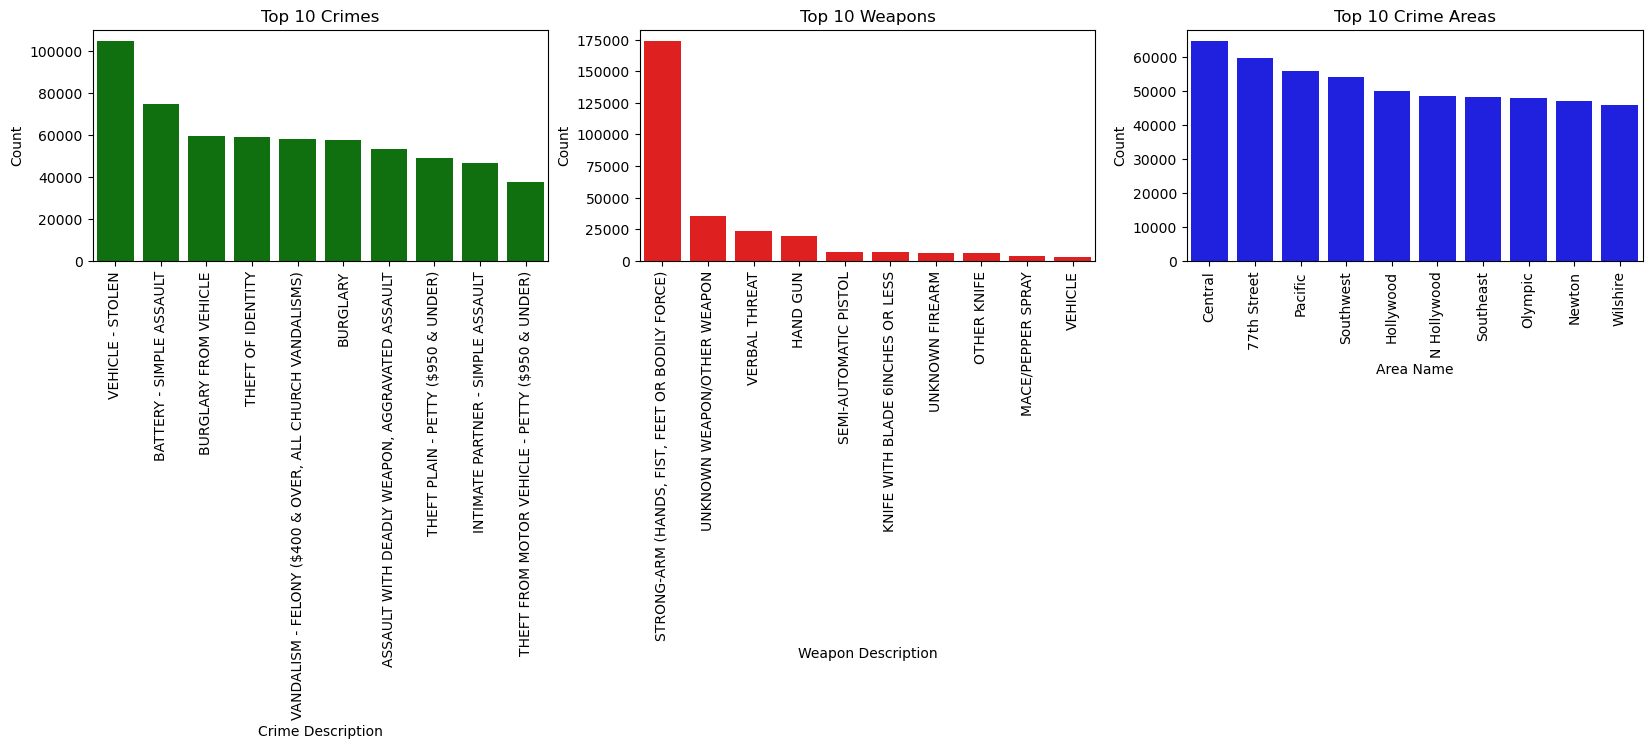

In [47]:
f, axs = plt.subplots(1, 3, figsize=(20, 3))
# Top 10 Crimes
sns.barplot(x=df_top10_crimes.index, y=df_top10_crimes.values, ax=axs[0], color= "green")
axs[0].set_title("Top 10 Crimes")
axs[0].set_xlabel("Crime Description")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=90)
# Top 10 Weapons
sns.barplot(x=df_top10_weapons.index, y=df_top10_weapons.values, ax=axs[1], color= "red")
axs[1].set_title("Top 10 Weapons")
axs[1].set_xlabel("Weapon Description")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=90)
# Top 10 Crime Areas
sns.barplot(x=df_top10_crime_areas.index, y=df_top10_crime_areas.values, ax=axs[2], color= "blue")
axs[2].set_title("Top 10 Crime Areas")
axs[2].set_xlabel("Area Name")
axs[2].set_ylabel("Count")
axs[2].tick_params(axis='x', rotation=90)

Die häufigste Straftat ist der Fahrzeugdiebstahl, gefolgt von einfachen Körperverletzungen und Einbrüchen in Fahrzeuge. In Los Angeles waren im Jahr 2023 insgesamt 7.496.930 Fahrzeuge registriert (https://www.laalmanac.com/transport/tr02.php). Bei einer Bevölkerungszahl von 3,821 Millionen entspricht dies etwa zwei Fahrzeugen pro Einwohner, was auf eine stark autoorientierte Gesellschaft hinweist. Dies könnte auch ein Grund dafür sein, warum eine hohe Anzahl von Straftaten in Zusammenhang mit Fahrzeugen steht. 

Die mit Abstand meist verwendete "Waffe" "Strong-Arm (Hands, Fist, Feet, or Bodily Force)" (insgesamt 174.057) beschreibt im kriminalistischen Kontext den Einsatz von physischen Körperteilen oder körperlicher Kraft, um eine Straftat zu begehen. Es handelt sich dabei nicht um den Einsatz von Waffen, sondern um reine körperliche Gewalt. Aus den Top-10 Crimes wurden mit hoher Wahrscheinlichkeit Straftaten wie "assault with deadly weapon, aggravated aussault" mit echten Waffen wie Schusswaffen oder Messern begangen. Das erklärt die Dominanz von "strong-arm" in diesem Diagramm.

Ein Blick auf die Top 10 Crime Areas zeigt, dass bestimmte Bezirke wie Central, 77th Street und Pacific als Kriminalitäts Hotspots gelten. Bezirk Central, welcher Downtown Los Angeles umfasst, ist durch hohe wirtschaftliche Aktivität, eine große Zahl an Touristen sowie eine hohe Obdachlosenquote geprägt. Diese Faktoren könnten zu einer höheren Zahl an Eigentumsdelikten wie Fahrzeugdiebstahl und Konflikten im öffentlichen Raum führen. In Bezirken wie 77th Street und Pacific könnten soziale und wirtschaftliche Herausforderungen wie Arbeitslosigkeit, eine hohe Bevölkerungsdichte und ein höherer Anteil einkommensschwacher Haushalte eine Rolle spielen.

# Verteilung der Straftaten nach Tageszeit

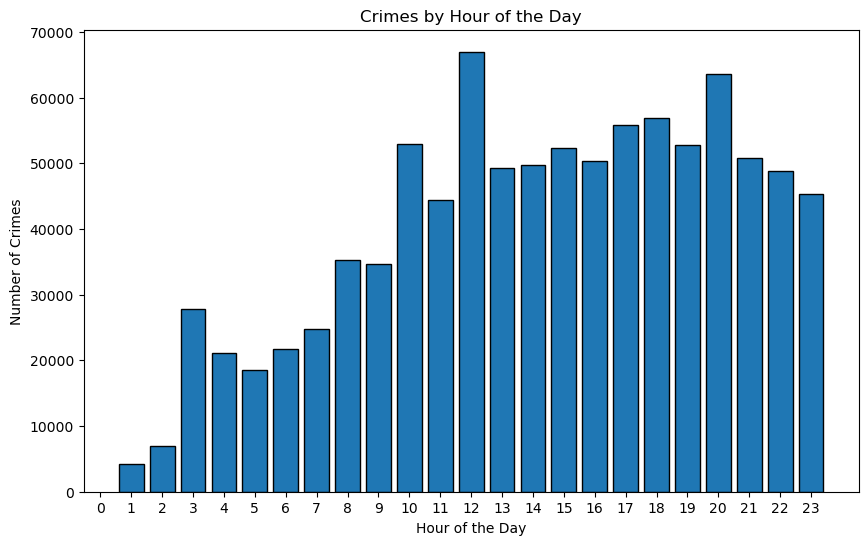

In [42]:
df_time_occ = df.copy()
# Konvertiert die Spalte "TIME OCC" in datetime Format (Stunde und Minute 24 Stunden Format), ungültige Werte die nicht ins Format passen werden in NaT (Not a Time) umgewandelt
df_time_occ["TIME OCC"] = pd.to_datetime(df_time_occ["TIME OCC"], format="%H%M", errors="coerce")
# Extrahiere die Stunde aus der TIME OCC Spalte
df_time_occ["TIME OCC"] = df_time_occ["TIME OCC"].dt.hour.astype("Int64") # Konvertiert die Spalte in Ganzzahlen, wobei NaN weiterhin unterstützt wird
# Zählt wie oft jede Stunde in der Spalte vorkommt und sortiert nach Stunde
df_crimes_per_hour = df_time_occ["TIME OCC"].value_counts().sort_index()
# Ausgabe als Barchart
plt.figure(figsize=(10, 6))
plt.bar(df_crimes_per_hour.index, df_crimes_per_hour.values, edgecolor='black')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Hour of the Day")
plt.xticks(range(24))  # zeigt die Stunden von 0 bis 23 an
plt.show()


0 existiert nicht da im datensatz entweder 1 oder 2359 steht

Die Analyse der Verteilung von Verbrechen über den Tagesverlauf zeigt ein überraschendes Ergebnis: Die höchste Anzahl an Straftaten tritt zwischen 12 und 13 Uhr auf, also mitten am Tag. Dieses Muster widerspricht der häufigen Annahme, dass ein Großteil der kriminellen Aktivitäten in den frühen Morgenstunden oder während der späten Abendstunden stattfindet, wenn es dunkler und potenziell gefährlicher ist.

Das Diagramm verdeutlicht außerdem, dass die Kriminalitätszahlen nach Mitternacht zunächst relativ niedrig sind und dann im Laufe des Vormittags kontinuierlich ansteigen. Ab der Mittagszeit bleibt die Verbrechensrate bis in den Abend hinein auf einem konstant hohen Niveau, bevor sie in den späten Abendstunden allmählich wieder abnimmt.

Eine genauere Analyse ist notwendig, um herauszufinden, welche Arten von Straftaten zu den verschiedenen Tageszeiten begangen werden.

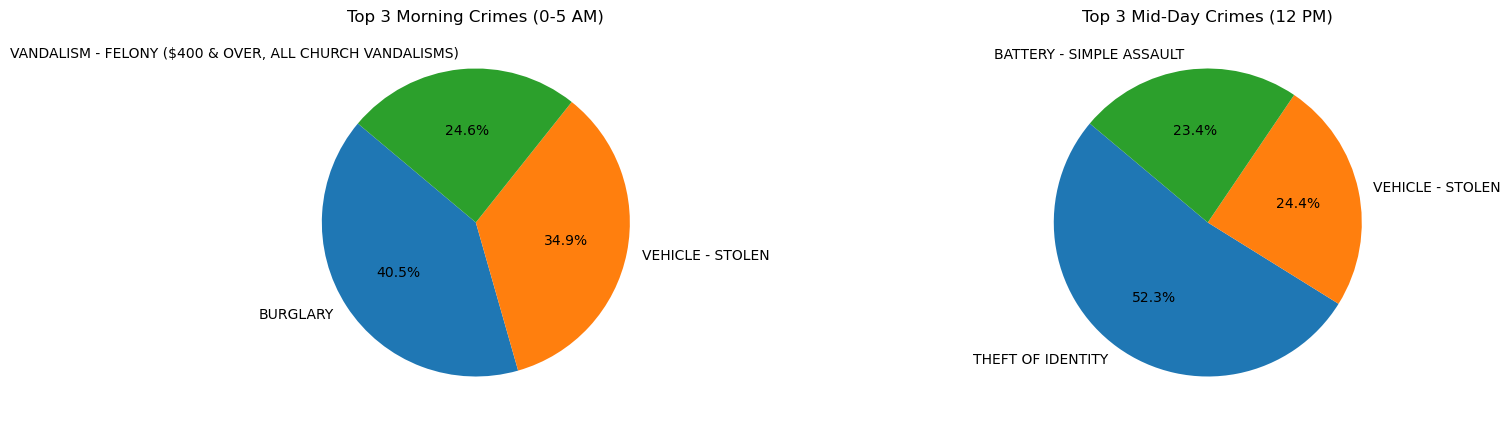

In [11]:
# Verbrechen die zwischen 0 Uhr und 5 Uhr stattgefunden haben
morning_crimes = df_time_occ[(df_time_occ["TIME OCC"] >= 0) & (df_time_occ["TIME OCC"] <= 5)]
morning_crimes_types = morning_crimes["Crm Cd Desc"].value_counts()
# Verbrechen die zwischen 12 und 13 Uhr stattgefunden haben
mid_day_crimes = df_time_occ[df_time_occ["TIME OCC"] == 12]
mid_day_crimes = mid_day_crimes["Crm Cd Desc"].value_counts()

f, axs = plt.subplots(1, 2, figsize=(15, 5))
# autopct gibt Prozentangaben mit einer Nachkommastelle an, starangle legt den Startwinkel des ersten Segments für bessere Lesbarkeit fest
axs[0].pie(morning_crimes_types.head(3), labels=morning_crimes_types.head(3).index, autopct='%1.1f%%', startangle=140) 
axs[0].set_title("Top 3 Morning Crimes (0-5 AM)")
axs[1].pie(mid_day_crimes.head(3), labels=mid_day_crimes.head(3).index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Top 3 Mid-Day Crimes (12 PM)")
plt.subplots_adjust(wspace=0.7)
plt.show()

Einbrüche und Vandalismus dominieren in der Nacht- und in den frühen Morgenstunden, während Identitätsdiebstahl und Körperverletzung tagsüber häufiger sind.
Dies spiegelt typische Verbrechensmuster wider: Eigentumsverbrechen (Einbruch, Diebstahl) finden häufiger statt, wenn weniger Überwachung herrscht, während Konflikt- oder Betrugsdelikte tagsüber dominieren. Dies könnte darauf hinweisen, dass solche Verbrechen oft in Verbindung mit geschäftlichen Aktivitäten oder öffentlichem Internetzugang stehen, die tagsüber stattfinden.

# Status der Verbrechen

In [54]:
df_status_desc = df.copy()
df_status_desc = df_status_desc["Status"].value_counts()
df_status_desc = df_status_desc.reset_index()
df_status_desc.columns = ["Status", "Anzahl"]
df_status_desc["Prozent"] = (df_status_desc["Anzahl"] / df_status_desc["Anzahl"].sum()) * 100
df_status_desc

,Status,Anzahl,Prozent
0,IC,762340,79.797935
1,AO,104682,10.957588
2,AA,83373,8.727068
3,JA,3139,0.328575
4,JO,1799,0.188310
5,CC,5,0.000523


Die Verteilung der Verbrechensstatus liefert wertvolle Einblicke in den Bearbeitungsstand der gemeldeten Straftaten. Der Status IC (Investigation Continued) dominiert mit 79,8 %, was darauf hinweist, dass ein Großteil der Fälle noch in Bearbeitung ist oder weiter untersucht wird. Dies könnte ein Zeichen für die hohe Arbeitsbelastung der Ermittlungsbehörden oder komplexe Untersuchungsprozesse sein. Im Vergleich dazu machen die Status AO (Arrest Other) mit 10,96 % und AA (Adult Arrest) mit 8,73 % einen deutlich kleineren Anteil aus. Diese Kategorien spiegeln den Anteil der Fälle wider, die zu Festnahmen führen.

Die Status JA (Juvenile Arrest) und JO (Juvenile Other) treten mit 0,33 % bzw. 0,19 % seltener auf, was auf die geringere Häufigkeit von Straftaten durch Jugendliche hinweisen könnte. Der Status CC (Canceled Case) ist mit nur 5 Fällen nahezu irrelevant, was darauf schließen lässt, dass Fälle selten storniert werden.

Insgesamt zeigt die Verteilung, dass die Mehrheit der Fälle im Ermittlungsprozess verbleibt, während nur ein kleinerer Teil zu konkreten Maßnahmen wie Festnahmen führt.